# PyCaret - Credit Card Default Problem - Binary Classification

In [ ]:
# install Pycaret if not insatalled
# pip install --pre pycaret

## Import PyCaret 3.0

In [1]:
# load all datasets available in the Pycaret Library
from pycaret.datasets import *

In [2]:
df = get_data('credit')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [4]:
# let's see all fetures
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [5]:
# let's describe our df
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,...,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,167876.403333,1.600917,1.850958,1.553000,35.446708,-0.023875,-0.140500,-0.170000,-0.221500,-0.266833,...,43172.528083,40190.249458,38722.892708,5687.489833,5.928435e+03,5227.245458,4766.803417,4774.861792,5280.923917,0.221083
std,129907.454723,0.489720,0.787361,0.521331,9.180845,1.123806,1.194216,1.198712,1.171784,1.133220,...,64075.909188,60385.391344,59259.183390,17011.021882,2.423232e+04,17918.982291,15421.988078,15400.224129,18214.205137,0.414985
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-53007.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2294.000000,1718.500000,1238.000000,1000.000000,8.200000e+02,390.000000,285.000000,239.750000,111.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19000.000000,18059.500000,16846.000000,2102.500000,2.013000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54837.250000,50320.000000,49327.500000,5011.000000,5.000000e+03,4512.000000,4040.250000,4024.250000,4010.500000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  24000 non-null  int64  
 1   SEX        24000 non-null  int64  
 2   EDUCATION  24000 non-null  int64  
 3   MARRIAGE   24000 non-null  int64  
 4   AGE        24000 non-null  int64  
 5   PAY_1      24000 non-null  int64  
 6   PAY_2      24000 non-null  int64  
 7   PAY_3      24000 non-null  int64  
 8   PAY_4      24000 non-null  int64  
 9   PAY_5      24000 non-null  int64  
 10  PAY_6      24000 non-null  int64  
 11  BILL_AMT1  24000 non-null  float64
 12  BILL_AMT2  24000 non-null  float64
 13  BILL_AMT3  24000 non-null  float64
 14  BILL_AMT4  24000 non-null  float64
 15  BILL_AMT5  24000 non-null  float64
 16  BILL_AMT6  24000 non-null  float64
 17  PAY_AMT1   24000 non-null  float64
 18  PAY_AMT2   24000 non-null  float64
 19  PAY_AMT3   24000 non-null  float64
 20  PAY_AM

In [8]:
# original dataset shape
df.shape

(24000, 24)

In [6]:
# Let' seperate Data for Trainning, Validaiton and Testing
data = df.sample(frac=0.95,random_state=42)

In [10]:
# shape of data held for trainning and testing through the Pycaret by default module.
data.shape

(22800, 24)

In [15]:
# let's see the validation data, that we use for future predicitons
data_unseen_validation = df.drop(data.index)
data_unseen_validation.shape

(1200, 24)

## Setup our Data for Machine Learning

In [17]:
from pycaret.classification import *

In [18]:
clf = setup(data=data,target='default',session_id=42)

,Description,Value
0,Session id,42
1,Target,default
2,Target type,Binary
3,Original data shape,"(22800, 24)"
4,Transformed data shape,"(22800, 24)"
5,Transformed train set shape,"(15959, 24)"
6,Transformed test set shape,"(6841, 24)"
7,Numeric features,23
8,Preprocess,True
9,Imputation type,simple


### Exploratory Data Analysis (EDA) using the AutoViz library.

In [ ]:
# install AutoViz Library for EDA
# pip install autoviz

In [ ]:
# launch eda
eda(display_format = 'bokeh')

In [19]:
# let's initiate our compare_model function to find the best estimators for our data
init_models = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8219,0.7806,0.3640,0.6845,0.4750,0.3798,0.4074,2.0230
catboost,CatBoost Classifier,0.8203,0.7785,0.3697,0.6716,0.4767,0.3791,0.4039,7.8350
lightgbm,Light Gradient Boosting Machine,0.8202,0.7755,0.3615,0.6773,0.4710,0.3747,0.4017,0.3810
ada,Ada Boost Classifier,0.8162,0.7721,0.3225,0.6793,0.4371,0.3436,0.3778,0.5820
rf,Random Forest Classifier,0.8153,0.7597,0.3663,0.6480,0.4678,0.3664,0.3883,1.0490
et,Extra Trees Classifier,0.8123,0.7501,0.3674,0.6321,0.4645,0.3602,0.3799,0.7040
lda,Linear Discriminant Analysis,0.8113,0.7175,0.2578,0.7030,0.3768,0.2929,0.3445,0.0590
xgboost,Extreme Gradient Boosting,0.8102,0.7577,0.3618,0.6241,0.4577,0.3525,0.3719,1.6470
ridge,Ridge Classifier,0.8002,0.0000,0.1512,0.7440,0.2508,0.1904,0.2726,0.0330
lr,Logistic Regression,0.7783,0.6417,0.0000,0.0000,0.0000,0.0000,0.0000,1.6140


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [20]:
# let's print best hyperperameters for the top estimators
print(init_models)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [21]:
# let's see the list of all available estimators for classificaiton
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


## Create Model

In [23]:
# Let's create the top 3 models for further processings
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8145,0.7596,0.3305,0.6648,0.4415,0.3450,0.3754
1,0.8214,0.7814,0.3644,0.6825,0.4751,0.3793,0.4064
2,0.8221,0.7800,0.3701,0.6823,0.4799,0.3837,0.4099
3,0.8302,0.7896,0.4096,0.7005,0.5169,0.4224,0.4448
4,0.8258,0.8060,0.3870,0.6919,0.4964,0.4011,0.4258
5,0.8296,0.7970,0.3814,0.7181,0.4982,0.4069,0.4365
6,0.8164,0.7567,0.3362,0.6723,0.4482,0.3525,0.3830
7,0.8195,0.7880,0.3588,0.6755,0.4686,0.3720,0.3991
8,0.8139,0.7804,0.3286,0.6591,0.4386,0.3417,0.3715


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [24]:
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8095,0.7541,0.3390,0.6316,0.4412,0.3387,0.3626
1,0.8177,0.7758,0.3559,0.6667,0.4641,0.3662,0.3924
2,0.8183,0.7769,0.3701,0.6616,0.4746,0.3752,0.3984
3,0.8246,0.7840,0.4068,0.6729,0.5070,0.4081,0.4273
4,0.8252,0.8007,0.3870,0.6884,0.4955,0.3996,0.4239
5,0.8277,0.7837,0.3842,0.7047,0.4973,0.4040,0.4311
6,0.8114,0.7576,0.3305,0.6464,0.4374,0.3380,0.3655
7,0.8221,0.7880,0.3701,0.6823,0.4799,0.3837,0.4099
8,0.8139,0.7849,0.3456,0.6489,0.4510,0.3513,0.3766


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [25]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8114,0.7590,0.3362,0.6432,0.4416,0.3413,0.3673
1,0.8139,0.7728,0.3446,0.6524,0.4510,0.3516,0.3776
2,0.8227,0.7765,0.3785,0.6802,0.4864,0.3896,0.4140
3,0.8214,0.7759,0.3870,0.6683,0.4902,0.3911,0.4126
4,0.8221,0.7997,0.3983,0.6651,0.4982,0.3982,0.4176
5,0.8315,0.7830,0.3814,0.7297,0.5009,0.4113,0.4427
6,0.8152,0.7576,0.3362,0.6648,0.4465,0.3496,0.3790
7,0.8227,0.7828,0.3559,0.6961,0.4710,0.3776,0.4083
8,0.8145,0.7781,0.3286,0.6629,0.4394,0.3431,0.3735


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## Tune Models

In [27]:
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8127,0.7612,0.3362,0.6503,0.4432,0.3440,0.3711
1,0.8195,0.7721,0.3757,0.6650,0.4801,0.3810,0.4038
2,0.8233,0.7837,0.3729,0.6875,0.4835,0.3881,0.4145
3,0.8283,0.7837,0.4068,0.6923,0.5125,0.4167,0.4384
4,0.8283,0.8079,0.3955,0.7000,0.5054,0.4111,0.4357
5,0.8321,0.8011,0.3814,0.7337,0.5019,0.4128,0.4448
6,0.8127,0.7588,0.3277,0.6554,0.4369,0.3392,0.3686
7,0.8246,0.7888,0.3729,0.6947,0.4853,0.3909,0.4185
8,0.8158,0.7808,0.3399,0.6630,0.4494,0.3523,0.3807


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [28]:
tuned_catboost = tune_model(catboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8127,0.7649,0.3277,0.6554,0.4369,0.3392,0.3686
1,0.8214,0.7809,0.3616,0.6845,0.4732,0.3778,0.4057
2,0.8264,0.7775,0.3814,0.6995,0.4936,0.3996,0.4264
3,0.8296,0.7907,0.4040,0.7010,0.5125,0.4182,0.4415
4,0.8264,0.8067,0.3927,0.6915,0.5009,0.4054,0.4292
5,0.8283,0.7957,0.3814,0.7105,0.4963,0.4040,0.4324
6,0.8139,0.7628,0.3333,0.6592,0.4428,0.3452,0.3742
7,0.8202,0.7922,0.3588,0.6791,0.4695,0.3734,0.4010
8,0.8164,0.7857,0.3286,0.6744,0.4419,0.3473,0.3795


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [29]:
tuned_lightgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8102,0.7617,0.3249,0.6425,0.4315,0.3320,0.3599
1,0.8177,0.7755,0.3644,0.6615,0.4699,0.3708,0.3949
2,0.8264,0.7775,0.3842,0.6974,0.4954,0.4011,0.4271
3,0.8321,0.7875,0.4209,0.7028,0.5265,0.4321,0.4531
4,0.8252,0.8087,0.3814,0.6923,0.4918,0.3968,0.4225
5,0.8302,0.7950,0.3729,0.7293,0.4935,0.4040,0.4369
6,0.8177,0.7585,0.3390,0.6780,0.4520,0.3569,0.3878
7,0.8195,0.7891,0.3616,0.6737,0.4706,0.3735,0.3998
8,0.8145,0.7820,0.3343,0.6592,0.4436,0.3463,0.3751


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


## Ensemble initial Models for better results

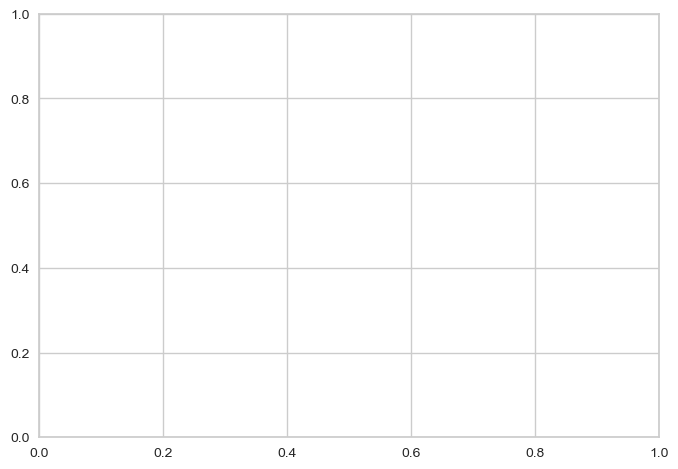

In [39]:
# ensemble 'gbc' model
ensemble_boosting_gbc = ensemble_model(gbc,method='Boosting')

In [ ]:
# ensemble 'catboost' model
ensemble_boosting_catboost = ensemble_model(catboost,method='Boosting')

In [ ]:
# ensemble 'lightgbm' model
ensemble_boosting_lightgbm = ensemble_model(lightgbm,method='Boosting')

## Blend initial, Tuned and Ensemble Models to check wich provide better results?

In [ ]:
# 1-  Blend Initial models
blender_init = blend_models([gbc, catboost, lightgbm], choose_better=True)

In [ ]:
# 2-  Blend Initial models
blender_tuned = blend_models([tuned_gbc, tuned_catboost, tuned_lightgbm], choose_better=True)

In [ ]:
# 3-  Blend Initial models
blender_ensemble = blend_models([ensemble_boosting_gbc, ensemble_boosting_catboost, ensemble_boosting_lightgbm], choose_better=True)

We can again tuned our models after blending them.

## Predictions

### Predicaitons on Unseen Data

In [30]:
# our Original Model 'gbc' is better then 'tuned_gbc', so we use orginal estimator to see predicitons
unseen_preds_gbc = predict_model(gbc,data=data_unseen_validation)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8300,0.7726,0.3651,0.6765,0.4742,0.3835,0.4094


In [33]:
print(unseen_preds_gbc)

      LIMIT_BAL  SEX  EDUCATION  MARRIAGE   AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0      260000.0  2.0        1.0       2.0  51.0   -1.0   -1.0   -1.0   -1.0   
1       80000.0  1.0        1.0       2.0  31.0   -1.0   -1.0   -1.0   -1.0   
2       90000.0  1.0        2.0       2.0  35.0    0.0    0.0    0.0    0.0   
3       80000.0  2.0        2.0       1.0  23.0    1.0    2.0    3.0    2.0   
4       30000.0  1.0        1.0       2.0  41.0    2.0    2.0    2.0    2.0   
...         ...  ...        ...       ...   ...    ...    ...    ...    ...   
1195   150000.0  1.0        5.0       1.0  36.0    0.0    0.0    0.0    0.0   
1196    10000.0  1.0        3.0       1.0  42.0    2.0    2.0    0.0    0.0   
1197   140000.0  1.0        2.0       1.0  34.0    0.0    0.0    0.0    0.0   
1198   410000.0  1.0        1.0       2.0  34.0    0.0    0.0    0.0   -1.0   
1199    80000.0  1.0        3.0       1.0  36.0    0.0    0.0    0.0    0.0   

      PAY_5  ...  BILL_AMT6  PAY_AMT1  PAY_AMT2  PA

In [31]:
# our Original Model 'catboost' perform less then 'tuned_catboost', so we use tunned estimator to see predicitons
unseen_preds_catboost = predict_model(tuned_catboost,data=data_unseen_validation)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8317,0.7786,0.3611,0.6894,0.4740,0.3852,0.4138


c:\Users\IT LAND\anaconda3\envs\pycaret3.0\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


In [34]:
print(unseen_preds_catboost)

      LIMIT_BAL  SEX  EDUCATION  MARRIAGE   AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0      260000.0  2.0        1.0       2.0  51.0   -1.0   -1.0   -1.0   -1.0   
1       80000.0  1.0        1.0       2.0  31.0   -1.0   -1.0   -1.0   -1.0   
2       90000.0  1.0        2.0       2.0  35.0    0.0    0.0    0.0    0.0   
3       80000.0  2.0        2.0       1.0  23.0    1.0    2.0    3.0    2.0   
4       30000.0  1.0        1.0       2.0  41.0    2.0    2.0    2.0    2.0   
...         ...  ...        ...       ...   ...    ...    ...    ...    ...   
1195   150000.0  1.0        5.0       1.0  36.0    0.0    0.0    0.0    0.0   
1196    10000.0  1.0        3.0       1.0  42.0    2.0    2.0    0.0    0.0   
1197   140000.0  1.0        2.0       1.0  34.0    0.0    0.0    0.0    0.0   
1198   410000.0  1.0        1.0       2.0  34.0    0.0    0.0    0.0   -1.0   
1199    80000.0  1.0        3.0       1.0  36.0    0.0    0.0    0.0    0.0   

      PAY_5  ...  BILL_AMT6  PAY_AMT1  PAY_AMT2  PA

In [32]:
# our Original Model 'lightgbm' perform less then 'tuned_lightgbm', so we use tunned estimator to see predicitons
unseen_preds_lightgbm = predict_model(tuned_lightgbm,data=data_unseen_validation)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8267,0.7748,0.3532,0.6642,0.4611,0.3692,0.3953


In [35]:
print(unseen_preds_lightgbm)

      LIMIT_BAL  SEX  EDUCATION  MARRIAGE   AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0      260000.0  2.0        1.0       2.0  51.0   -1.0   -1.0   -1.0   -1.0   
1       80000.0  1.0        1.0       2.0  31.0   -1.0   -1.0   -1.0   -1.0   
2       90000.0  1.0        2.0       2.0  35.0    0.0    0.0    0.0    0.0   
3       80000.0  2.0        2.0       1.0  23.0    1.0    2.0    3.0    2.0   
4       30000.0  1.0        1.0       2.0  41.0    2.0    2.0    2.0    2.0   
...         ...  ...        ...       ...   ...    ...    ...    ...    ...   
1195   150000.0  1.0        5.0       1.0  36.0    0.0    0.0    0.0    0.0   
1196    10000.0  1.0        3.0       1.0  42.0    2.0    2.0    0.0    0.0   
1197   140000.0  1.0        2.0       1.0  34.0    0.0    0.0    0.0    0.0   
1198   410000.0  1.0        1.0       2.0  34.0    0.0    0.0    0.0   -1.0   
1199    80000.0  1.0        3.0       1.0  36.0    0.0    0.0    0.0    0.0   

      PAY_5  ...  BILL_AMT6  PAY_AMT1  PAY_AMT2  PA

### Predicaitons on Holdout Data


In [ ]:
# predict on hold-out 'gbc'
hold_out_data_Predictions_gbc = predict_model(gbc)

In [ ]:
# predict on hold-out 'catboost'
hold_out_data_Predictions_catboost = predict_model(catboost)

In [ ]:
# predict on hold-out 'lightgbm'
hold_out_data_Predictions_lightgbm = predict_model(lightgbm)

## Evaluate Model

In [38]:
evaluate_model(gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Interpret Model

### Morris Sensitivity Analysis

In [ ]:
# interpret  initial model
interpret_model(gbc,plot='msa')

In [ ]:
# interpret  initial model
interpret_model(catboost,plot='msa')

In [ ]:
# interpret  initial model
interpret_model(lightgbm,plot='msa')

### Permutation Feature Importance

In [ ]:
# interpret  initial model
interpret_model(gbc,plot='pfi')

In [ ]:
# interpret  initial model
interpret_model(catboost,plot='pfi')

In [ ]:
# interpret  initial model
interpret_model(lightgbm,plot='pfi')

## Finalize Model

- This `finalize_model` function trains a given model on the entire dataset including the hold-out set.
- This function doesn't change any parameter of the model. It only refits on the entire dataset including the hold-out set.

In [ ]:
# finalize a model
# finalize_model(rf)

## Save Model
This function saves the transformation pipeline and a trained model object into the current working directory as a pickle file for later use.

In [ ]:
# save pipeline
# save_model(dt, 'model_name_of_your_choice')

### Save Model Configuraions
This function saves all the global variables to a pickle file, allowing to later resume without rerunning the setup function.

In [2]:
# save config
# save_config('my_model_config_name')

## Create Local App for testing
This function creates a basic `gradio app` for inference. It will later be expanded for other app types such `Streamlit`.

In [ ]:
# create app
# create_app(final_model_name)

## Auto ML.
This function returns the best model out of `all trained models` in the `current setup` based on the `optimize parameter`. `Metrics evaluated` can be accessed using the `get_metrics` function.

In [3]:
# # load dataset 
# from pycaret.datasets import get_data 
# data = get_data('diabetes') 

# # init setup 
# from pycaret.classification import *
# clf1 = setup(data, target = 'Class variable') 

# # compare models
# top5 = compare_models(n_select = 5) 

# # tune models
# tuned_top5 = [tune_model(i) for i in top5]

# # ensemble models
# bagged_top5 = [ensemble_model(i) for i in tuned_top5]

# # blend models
# blender = blend_models(estimator_list = top5) 

# # stack models
# stacker = stack_models(estimator_list = top5) 

# # automl 
# best = automl(optimize = 'Recall')
# print(best)